# Machine Learning Assignment Lab - 2
## Naive Bayes and KNN
### Keshav K S    3122 23 5001 067


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_curve, auc, roc_auc_score)




print("Libraries imported successfully.")

Libraries imported successfully.


In [30]:
print("Step 1 : Loading the dataset")

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "target"
]

df = pd.read_csv(url, header=None,names=column_names)
print(df.head())
print(df.describe())
print(df.info())


Step 1 : Loading the dataset
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...   

In [31]:
print(df.shape)

(4601, 58)


In [32]:
print("Step 2 : Performing Data Preprocessing")

print("Checking Missing Values")

missing_count = df.isnull().sum()
print("Missing values are :  ",missing_count)



Step 2 : Performing Data Preprocessing
Checking Missing Values
Missing values are :   word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab     

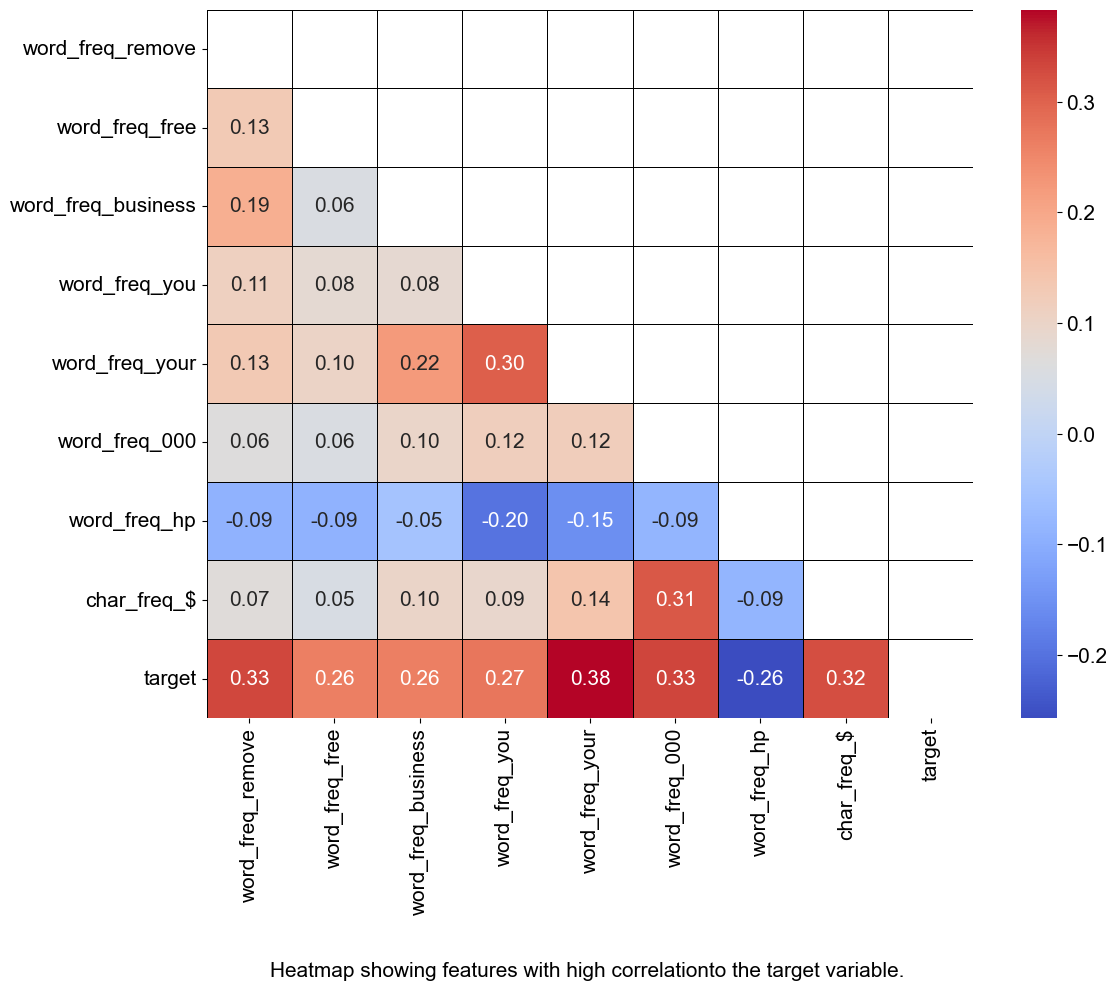

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


corr_matrix = df.corr()


target_corr = abs(corr_matrix["target"])
top_features = target_corr[target_corr > 0.25].index
df_top = df[top_features]

plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial"
})

bxwidth = 1

fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(df_top.corr(), dtype=bool))

sns.heatmap(
    df_top.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True,
    mask=mask,
    ax=ax,
    linewidths=0.5,
    linecolor='black'
)

ax.set_title("")



for spine in ax.spines.values():
    spine.set_linewidth(bxwidth)

fig.text(
    0.5, 0.01,
    "Heatmap showing features with high correlationto the target variable.",
    ha="center",
    fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig(
    "correlation_heatmap.eps",
    format="eps",
    dpi=600,
    bbox_inches="tight"
)

plt.show()

Step 4 : Visualizing class distribution and feature behavior


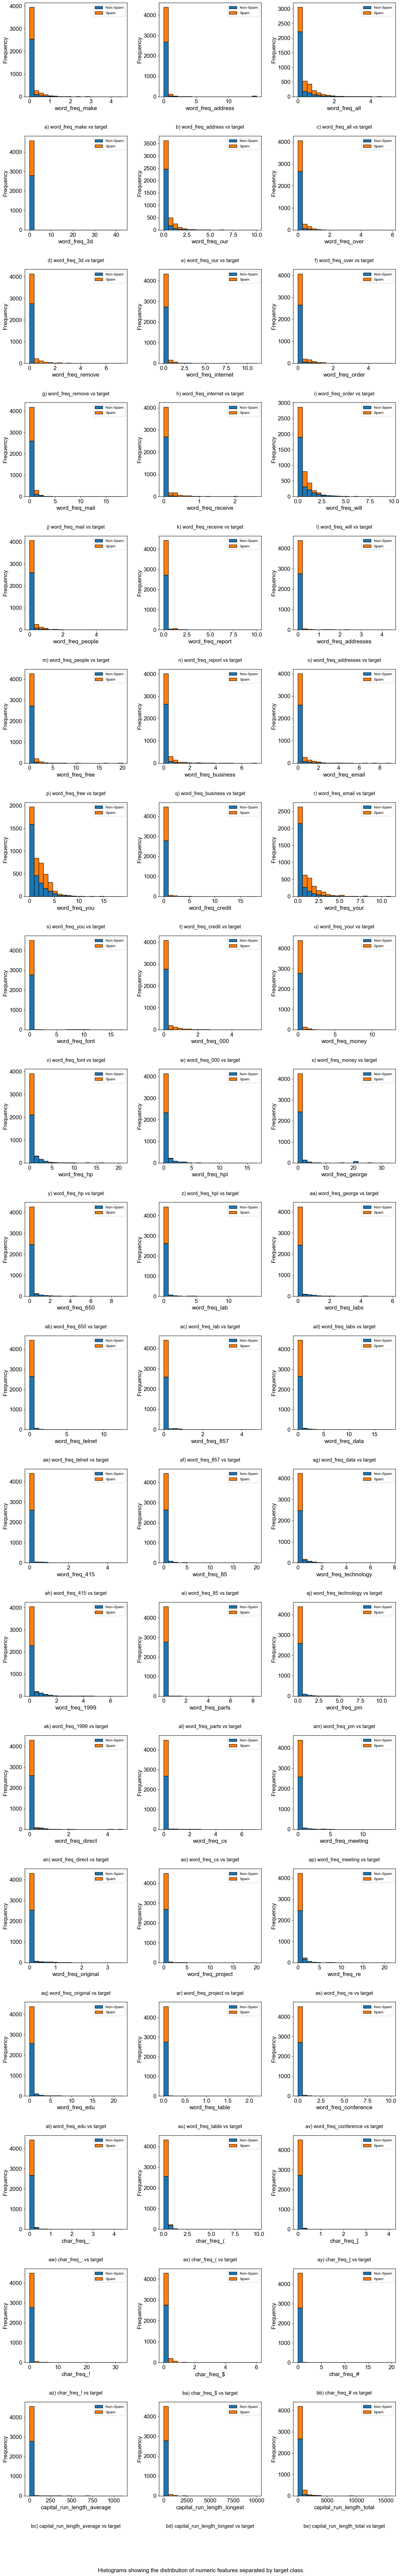

In [34]:
print("Step 4 : Visualizing class distribution and feature behavior")

numeric_df = df.drop(columns=['target']).select_dtypes(include=["int64", "float64"])
cols = numeric_df.columns

plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial" 
})

bxwidth = 1
rows = math.ceil(len(cols) / 3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

subplot_labels = []
for i in range(len(cols)):
    if i < 26:
        subplot_labels.append(f"{chr(97+i)})")
    else:
        subplot_labels.append(f"{chr(97+(i//26)-1)}{chr(97+(i%26))})")

for i, col in enumerate(cols):
    ax = axes[i]
    
    data_non_spam = df[df['target'] == 0][col].dropna()
    data_spam = df[df['target'] == 1][col].dropna()
    
   
    ax.hist(
        [data_non_spam, data_spam], 
        bins=20, 
        edgecolor="black",
        label=['Non-Spam', 'Spam'],
        color=['#1f77b4', '#ff7f0e'], 
        stacked=True 
    )

    ax.set_title("")

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    

    ax.legend(prop={'size': 10})

    ax.text(
        0.5, -0.30,
        f"{subplot_labels[i]} {col} vs target",
        ha="center",
        va="top",
        transform=ax.transAxes,
        fontsize=13
    )

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(
    0.5, 0.005,
    "Histograms showing the distribution of numeric features separated by target class.",
    ha="center",
    fontsize=15
)

plt.tight_layout(rect=[0, 0.02, 1, 1])

plt.savefig(
    "histogram_numeric_features.png",
    
    dpi=600,
    bbox_inches="tight"
)

plt.show()

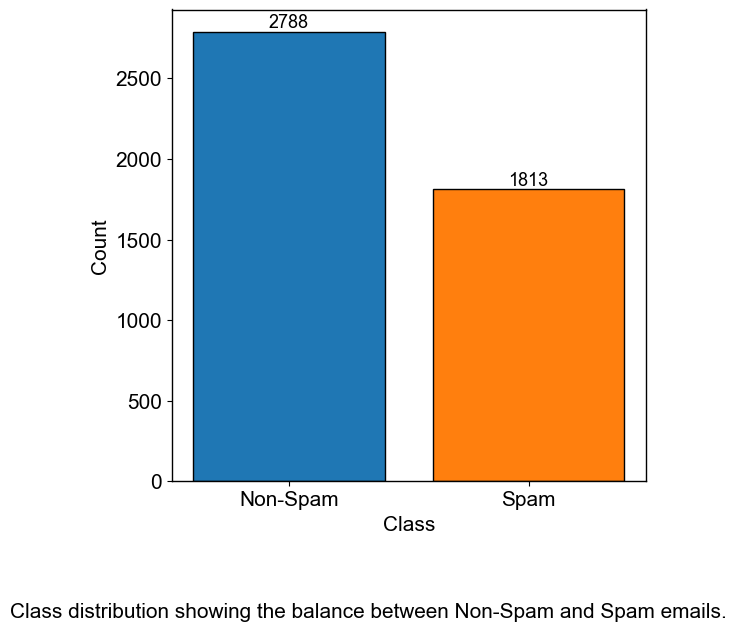

In [35]:
class_counts = df['target'].value_counts().sort_index()
classes = ['Non-Spam', 'Spam']
counts = [class_counts[0], class_counts[1]]

plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial"
})

bxwidth = 1

fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(classes, counts, color=['#1f77b4', '#ff7f0e'], edgecolor="black")

ax.set_title("")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=13)



for spine in ax.spines.values():
    spine.set_linewidth(bxwidth)

fig.text(
    0.5, -0.05, 
    "Class distribution showing the balance between Non-Spam and Spam emails.",
    ha="center",
    fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig(
    "class_distribution.png",
    
    dpi=600,
    bbox_inches="tight"
)

plt.show()

C:\Users\KESHA\AppData\Local\Temp\ipykernel_2000\2819539952.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


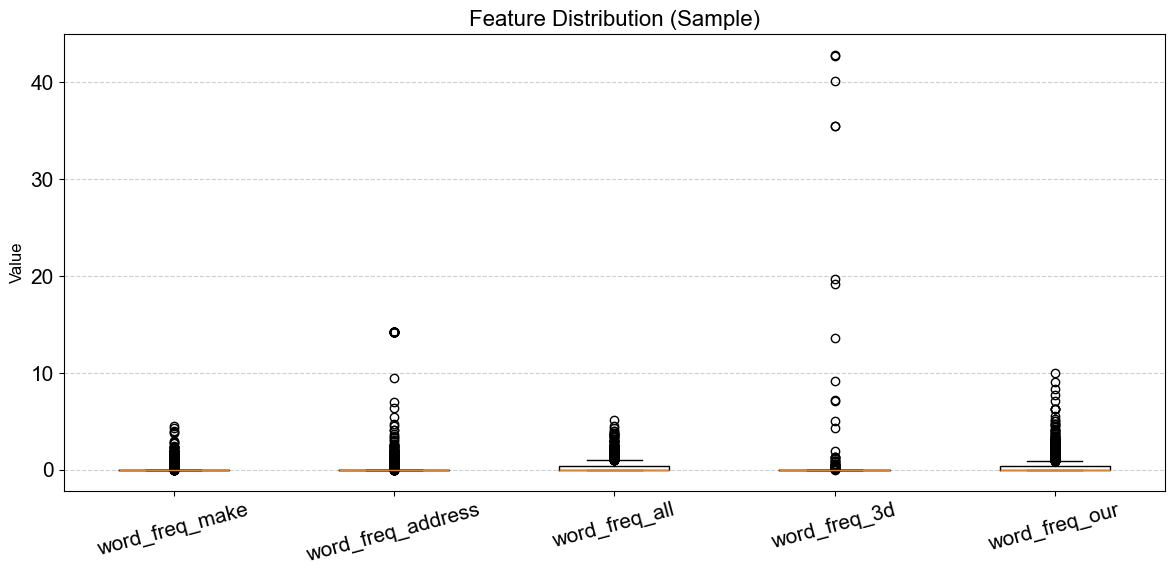

In [36]:
import matplotlib.pyplot as plt

features = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our'
]

data = [df[feature] for feature in features]

plt.figure(figsize=(12, 6))

plt.boxplot(
    data,
    labels=features,
    showfliers=True,         
   
)

plt.title("Feature Distribution (Sample)", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("feature_distribution",dpi = 600,bbox_inches = "tight")
plt.tight_layout()
plt.show()


In [37]:
print("Step 5 : Splitting the dataset into training and testing sets")

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Split Successful.\n")
print(f"Total Samples: {len(df)}")
print(f"Training Set:  {X_train.shape[0]} samples (80%)")
print(f"Testing Set:   {X_test.shape[0]} samples (20%)")

print("\nClass distribution in Training Set:")
print(y_train.value_counts(normalize=True))

Step 5 : Splitting the dataset into training and testing sets
Split Successful.

Total Samples: 4601
Training Set:  3680 samples (80%)
Testing Set:   921 samples (20%)

Class distribution in Training Set:
target
0    0.605978
1    0.394022
Name: proportion, dtype: float64


In [38]:
print("Scaling data")

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Scaling data


In [39]:
from sklearn.metrics import classification_report


print("Step 6: Training Naïve Bayes Variants")

start = time.time()
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
time_gnb= time.time() - start
y_pred_gnb = gnb.predict(X_test)

print("The training time for Gaussian Naive Bayes is: ",time_gnb)
print("Accuracy score",accuracy_score(y_test,y_pred_gnb))

print("Precision score",precision_score(y_test,y_pred_gnb))
print("Recall score",recall_score(y_test,y_pred_gnb))
print("F1 score",f1_score(y_test,y_pred_gnb))
print("Confusion matrix",confusion_matrix(y_test,y_pred_gnb))
print("Report",classification_report(y_test,y_pred_gnb))





bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
acc_bnb = accuracy_score(y_test, y_pred_bnb)



start = time.time()
bnb =BernoulliNB()
bnb.fit(X_train, y_train)
time_bnb=time.time()-start
y_pred_bnb = bnb.predict(X_test)
print("The training time for Bernoulli Naive Bayes is: ",time_bnb)

print("Accuracy score",accuracy_score(y_test,y_pred_bnb))

print("Precision score",precision_score(y_test,y_pred_bnb))
print("Recall score",recall_score(y_test,y_pred_bnb))
print("F1 score",f1_score(y_test,y_pred_bnb))
print("Confusion matrix",confusion_matrix(y_test,y_pred_bnb))
print("Report",classification_report(y_test,y_pred_bnb))





start = time.time()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
time_mnb=time.time()-start
y_pred_mnb = mnb.predict(X_test)
print("The training time for Multinomial Naive Bayes is: ",time_mnb)

print("Accuracy score",accuracy_score(y_test,y_pred_mnb))

print("Precision score",precision_score(y_test,y_pred_mnb))
print("Recall score",recall_score(y_test,y_pred_mnb))
print("F1 score",f1_score(y_test,y_pred_mnb))
print("Confusion matrix",confusion_matrix(y_test,y_pred_mnb))
print("Report",classification_report(y_test,y_pred_mnb))



Step 6: Training Naïve Bayes Variants
The training time for Gaussian Naive Bayes is:  0.006426334381103516
Accuracy score 0.5722041259500543
Precision score 0.4791946308724832
Recall score 0.9834710743801653
F1 score 0.644404332129964
Confusion matrix [[170 388]
 [  6 357]]
Report               precision    recall  f1-score   support

           0       0.97      0.30      0.46       558
           1       0.48      0.98      0.64       363

    accuracy                           0.57       921
   macro avg       0.72      0.64      0.55       921
weighted avg       0.77      0.57      0.53       921

The training time for Bernoulli Naive Bayes is:  0.00619053840637207
Accuracy score 0.8762214983713354
Precision score 0.8716417910447761
Recall score 0.8044077134986226
F1 score 0.836676217765043
Confusion matrix [[515  43]
 [ 71 292]]
Report               precision    recall  f1-score   support

           0       0.88      0.92      0.90       558
           1       0.87      0.80     

e:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


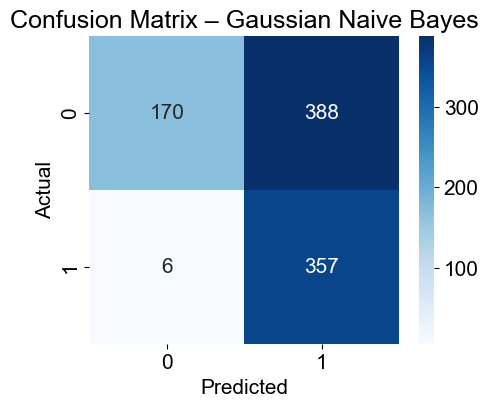

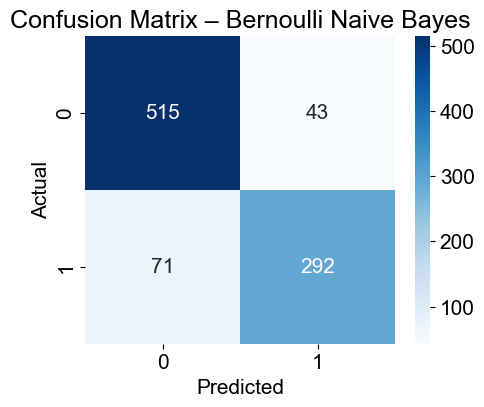

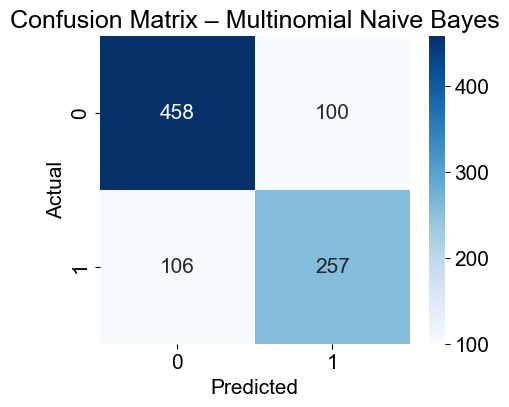

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, title):
    plt.figure()
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(np.arange(cm.shape[0]))
    plt.yticks(np.arange(cm.shape[0]))

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.tight_layout()
    plt.show()

cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("confusion_matrix_gaussian_nb.png", dpi=600, bbox_inches="tight")
plt.show()
plt.close()
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Bernoulli Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("confusion_matrix_bernoulli_nb.png", dpi=600, bbox_inches="tight")
plt.show()
plt.close()
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("confusion_matrix_multinomial_nb.png", dpi=600, bbox_inches="tight")
plt.show()
plt.close()



Step 7: Training Baseline KNN Classifier


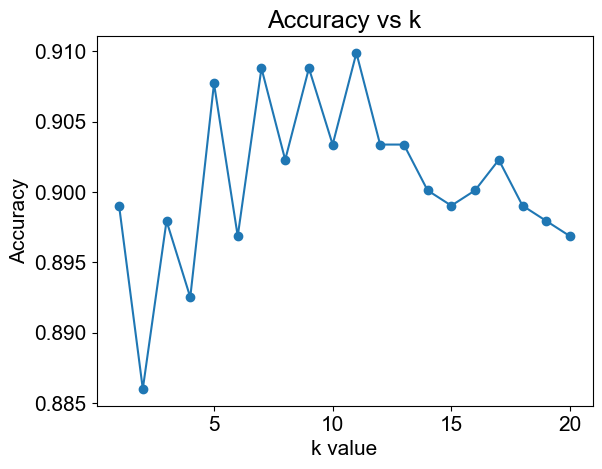

In [41]:
print("Step 7: Training Baseline KNN Classifier")

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


k_values = range(1, 21)
accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  accuracies.append(knn.score(X_test_scaled, y_test))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.savefig("accuracy_vs_k",dpi = 600,bbox_inches = "tight")
plt.show()

In [42]:
from sklearn.model_selection import StratifiedKFold


skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores_base=cross_val_score(
    knn,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)
print("Base KNN CV Accuracy:",cv_scores_base.mean())

Base KNN CV Accuracy: 0.8932065217391303


In [43]:

print("Step 8: Hyperparameter Tuning for KNN")

param_grid={
    'n_neighbors':list(range(1,21,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
grid=GridSearchCV(
    knn,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled,y_train)
print("Grid Best Params:",grid.best_params_)
print("Grid Best CV Accuracy:",grid.best_score_)



Step 8: Hyperparameter Tuning for KNN
Grid Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Grid Best CV Accuracy: 0.9252717391304348


In [44]:
random = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    n_iter=5,
    cv=5,
    scoring="accuracy",
    random_state=42
)
random.fit(X_train_scaled, y_train)
print("Random Best Params :",random.best_params_)
print("Random Best CV Accuracy : ",random.best_score_)



Random Best Params : {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}
Random Best CV Accuracy :  0.9209239130434783


In [45]:
best_params=grid.best_params_
knn_final=KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)
knn_final.fit(X_train_scaled,y_train)
y_pred_final=knn_final.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix,roc_curve,auc
def compute_metrics(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    tn,fp,fn,tp=cm.ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=2*precision*recall/(precision+recall)
    specificity=tn/(tn+fp)
    fpr=fp/(fp+tn)
    return accuracy,precision,recall,f1,specificity,fpr,cm

start=time.time()
knn_final.fit(X_train_scaled,y_train)
train_time=time.time()-start

start=time.time()
y_pred_knn=knn_final.predict(X_test_scaled)
pred_time=time.time()-start
acc,prec,rec,f1,spec,fpr,cm=compute_metrics(y_test,y_pred_knn)
print("Final KNN Metrics")
print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("F1 Score:",f1)
print("Specificity:",spec)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)



Final KNN Metrics
Accuracy: 0.9207383279044516
Precision: 0.9420731707317073
Recall: 0.8512396694214877
F1 Score: 0.894356005788712
Specificity: 0.9659498207885304
False Positive Rate: 0.034050179211469536
Training Time: 0.0014691352844238281
Prediction Time: 0.03354024887084961


#### Confusion Matrix

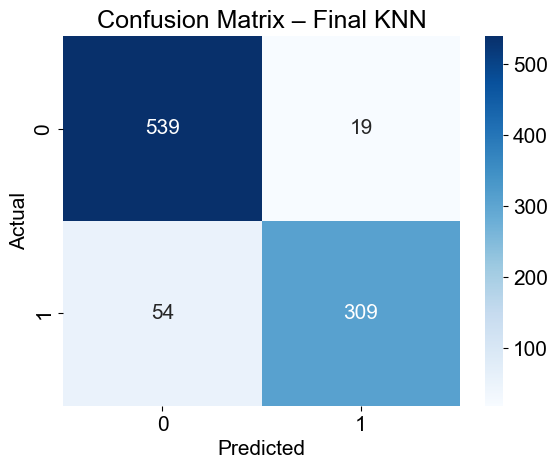

In [46]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix – Final KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

e:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
e:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


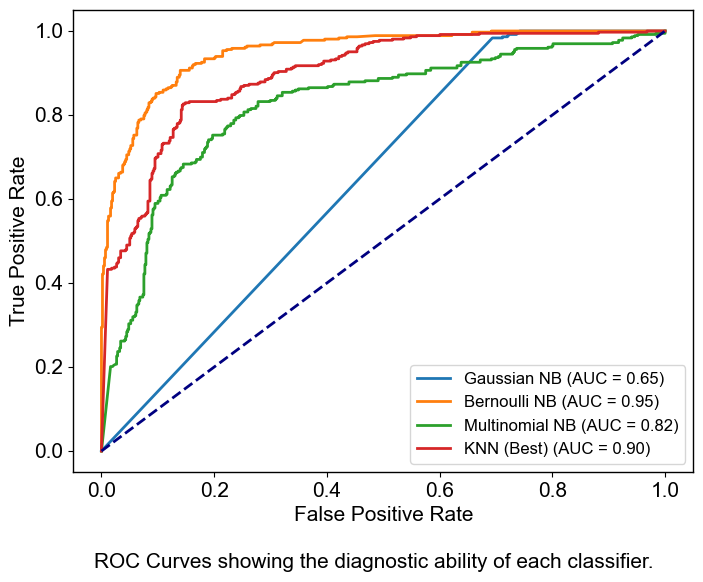

In [47]:
from sklearn.metrics import roc_curve, auc
model_specs = [
    ("Gaussian NB", gnb, X_test),
    ("Bernoulli NB", bnb, X_test),
    ("Multinomial NB", mnb, X_test),
    ("KNN (Best)", knn_final, X_test)
]
plt.figure(figsize=(8, 6))
ax = plt.gca()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

for i, (name, model, data) in enumerate(model_specs):
    y_prob = model.predict_proba(data)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, color=colors[i], lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

ax.set_title("")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right", prop={'size': 12})



for spine in ax.spines.values():
    spine.set_linewidth(bxwidth)

plt.gcf().text(
    0.5, -0.05,
    "ROC Curves showing the diagnostic ability of each classifier.",
    ha="center", fontsize=15
)

plt.savefig("roc_curves.png", format="png", dpi=600, bbox_inches="tight")
plt.show()

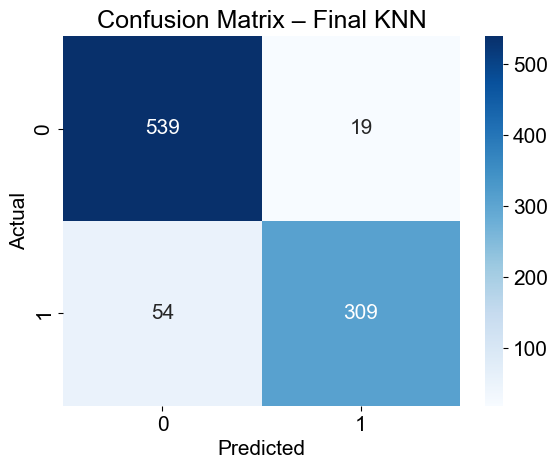

In [48]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix – Final KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KDTree

In [49]:
print("--- Step 9: Training Optimized KNN Models (KDTree & BallTree) ---")


best_params=grid.best_params_
optimal_k=best_params['n_neighbors']

start=time.time()
knn_kd=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='kd_tree'
)
knn_kd.fit(X_train_scaled,y_train)
train_time_kd=time.time()-start
start=time.time()
y_pred_kd=knn_kd.predict(X_test_scaled)
pred_time_kd=time.time()-start

acc_kd,prec_kd,rec_kd,f1_kd,sp,fpr,cm=compute_metrics(y_test,y_pred_kd)
print("Final KDtree Metrics")
print("Accuracy:",acc_kd)
print("Precision:",prec_kd)
print("Recall:",rec_kd)
print("F1 Score:",f1_kd)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

--- Step 9: Training Optimized KNN Models (KDTree & BallTree) ---
Final KDtree Metrics
Accuracy: 0.9207383279044516
Precision: 0.9420731707317073
Recall: 0.8512396694214877
F1 Score: 0.894356005788712
Specificity: 0.9659498207885304
False Positive Rate: 0.034050179211469536
Training Time: 0.0014691352844238281
Prediction Time: 0.03354024887084961


In [50]:
start=time.time()
knn_bt=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='ball_tree'
)
knn_bt.fit(X_train_scaled,y_train)
train_time_bt=time.time()-start
start=time.time()
y_pred_bt=knn_bt.predict(X_test_scaled)
pred_time_bt=time.time()-start

acc_bt,prec_bt,rec_bt,f1_bt,sp,fpr,cm=compute_metrics(y_test,y_pred_bt)
print("Final Balltree Metrics")
print("Accuracy:",acc_bt)
print("Precision:",prec_bt)
print("Recall:",rec_bt)
print("F1 Score:",f1_bt)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

Final Balltree Metrics
Accuracy: 0.9207383279044516
Precision: 0.9420731707317073
Recall: 0.8512396694214877
F1 Score: 0.894356005788712
Specificity: 0.9659498207885304
False Positive Rate: 0.034050179211469536
Training Time: 0.0014691352844238281
Prediction Time: 0.03354024887084961


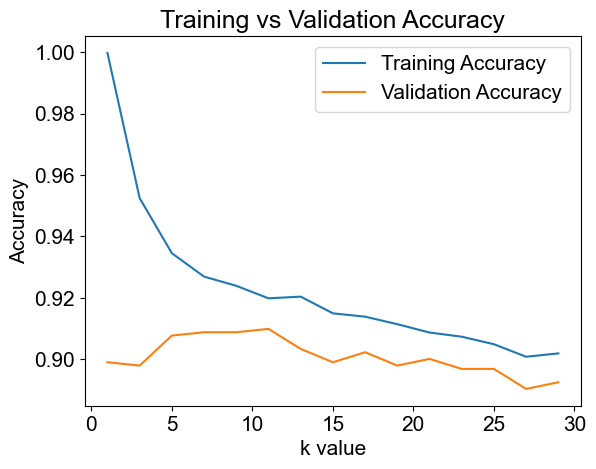

In [51]:
train_acc=[]
val_acc=[]
k_values=range(1,31,2)
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_acc.append(knn.score(X_train_scaled,y_train))
    val_acc.append(knn.score(X_test_scaled,y_test))
plt.plot(k_values,train_acc,label='Training Accuracy')
plt.plot(k_values,val_acc,label='Validation Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.savefig("train_valid_validation.png",dpi = 600 , bbox_inches = "tight")

plt.show()

### Cross Validation Scores

In [ ]:
gnb_scores=cross_val_score(
    GaussianNB(),s
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)
mnb_scores=cross_val_score(
    MultinomialNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)
bnb_scores=cross_val_score(
    BernoulliNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)
knn_kd_scores=cross_val_score(
    knn_kd,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)
knn_bt_scores=cross_val_score(
    knn_bt,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [53]:
print("One Way test")
from scipy.stats import f_oneway
F_stat,p_value=f_oneway(
    gnb_scores,
    mnb_scores,
    bnb_scores,
    knn_kd_scores,
    knn_bt_scores
)

print("F-statistic:",F_stat)
print("p-value:",p_value)
print("Gaussian NB Mean Accuracy:",gnb_scores.mean())
print("Multinomial NB Mean Accuracy:",mnb_scores.mean())
print("Bernoulli NB Mean Accuracy:",bnb_scores.mean())
print("KNN KDTree Mean Accuracy:",knn_kd_scores.mean())
print("KNN BallTree Mean Accuracy:",knn_bt_scores.mean(
))
best_model=max(
    [
        ("Gaussian NB",gnb_scores.mean()),
        ("Multinomial NB",mnb_scores.mean()),
        ("Bernoulli NB",bnb_scores.mean()),
        ("KNN KDTree",knn_kd_scores.mean()),
        ("KNN BallTree",knn_bt_scores.mean())
    ],
    key=lambda x:x[1]
)

print("Best Model:",best_model[0])

One Way test
F-statistic: 83.72948758252099
p-value: 3.3695720596139815e-12
Gaussian NB Mean Accuracy: 0.8206521739130436
Multinomial NB Mean Accuracy: 0.7869565217391304
Bernoulli NB Mean Accuracy: 0.8872282608695652
KNN KDTree Mean Accuracy: 0.9252717391304348
KNN BallTree Mean Accuracy: 0.9252717391304348
Best Model: KNN KDTree
